In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
# helper fuctions for regressions
def LinReg(data,N):
    x = data[0][0]
    y = data[0][1]
    X = np.array((1,x,y))
    Y = np.array([data[0][2]])
    for i in range(N-1):
        x = data[i+1][0]
        y = data[i+1][1]
        newrow = (1,x,y)
        newrow2 = (data[i+1][2])
        X = np.vstack((X,newrow))
        Y = np.vstack((Y,newrow2))
    Xt = np.transpose(X)
    X2 = np.matmul(Xt,X)
    X3 = np.linalg.inv(X2)
    Xfinal = np.matmul(X3,Xt)
    w = np.matmul(Xfinal,Y)
    return [w.item(0, 0), w.item(1, 0), w.item(2, 0)]

def NonLinReg(data,N):
    x = data[0][0]
    y = data[0][1]
    X = np.array((1,x,1/y,x**2*y))
    Y = np.array([data[0][2]])
    for i in range(N-1):
        x = data[i+1][0]
        y = data[i+1][1]
        newrow = (1,x,1/y,x**2*y)
        newrow2 = (data[i+1][2])
        X = np.vstack((X,newrow))
        Y = np.vstack((Y,newrow2))
    Xt = np.transpose(X)
    X2 = np.matmul(Xt,X)
    X3 = np.linalg.inv(X2)
    Xfinal = np.matmul(X3,Xt)
    w = np.matmul(Xfinal,Y)
    return [w.item(0, 0), w.item(1, 0), w.item(2, 0), w.item(3, 0)]

In [3]:
# helper functions to calculate mse
def LinDiff(data,f,N):
    diff = 0
    for i in range(N):
        x = data[i][0]
        y = data[i][1]
        val = f[0]+f[1]*x+f[2]*y
        diff += (val - data[i][2])**2
    return diff**(1/2)/N

def NonLinDiff(data,f,N):
    diff = 0
    for i in range(N):
        x = data[i][0]
        y = data[i][1]
        val = f[0]+ f[1]*x + f[2]/y + f[3]*x**2*y
        diff += (val - data[i][2])**2
    return diff**(1/2)/N

In [4]:
# load the data and pre-process
df = pd.read_csv("Q2_data.csv", header = None)
df.columns = ['A', 'B', 'C']
q2data = pd.DataFrame.to_numpy(df)

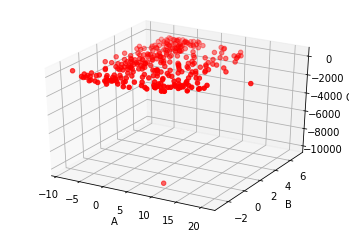

In [5]:
# exploratory analysis to visualize A vs. C, B vs. C, and 3D projection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df.A
y = df.B
z = df.C

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

plt.show()

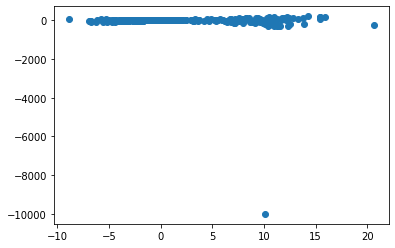

In [6]:
fig2 = plt.scatter(df.A, df.C)

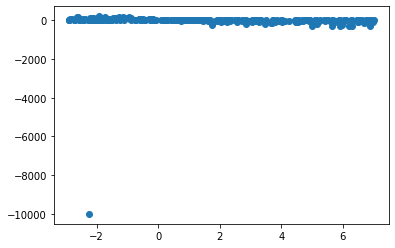

In [7]:
fig3 = plt.scatter(df.B, df.C)

In [8]:
# take out the outlier
df2 = df[df['C'] != df['C'].min()]

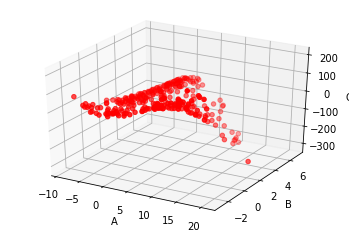

In [9]:
# Re-visualize
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df2.A
y = df2.B
z = df2.C

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

plt.show()

In [10]:
sum(q2data)/len(q2data)

array([  2.3170093 ,   2.01311467, -41.56491867])

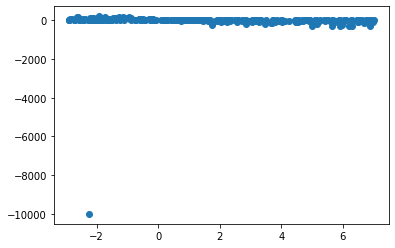

In [11]:
x = []
y = []
z = []
for i in range(len(q2data)):
    x += [q2data[i][0]]
    y += [q2data[i][1]]
    z += [q2data[i][2]]
view = plt.scatter(y,z)

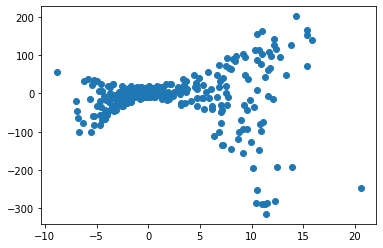

In [12]:
fig2 = plt.scatter(df2.A, df2.C)
# looks like a hyperbola

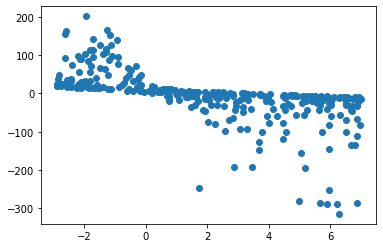

In [13]:
fig3 = plt.scatter(df2.B, df2.C)
# appears more linear than A vs. C

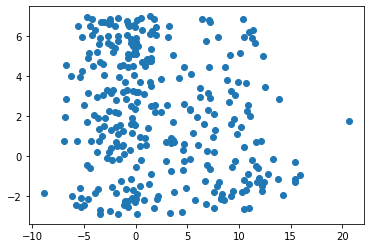

In [14]:
fig4 = plt.scatter(df2.A, df2.B)
# A nd B do not seem to be correlated

In [15]:
# starting with linear regression, as it is alwasy best to start with
# simple models
data2 = pd.DataFrame.to_numpy(df2)
reg_coef = LinReg(data2,len(data2))
wrong = LinDiff(data2,reg_coef,len(data2))
print(wrong)
print(reg_coef)

3.2054428007326043
[25.731987574046478, -1.36671414766076, -15.221917785310309]


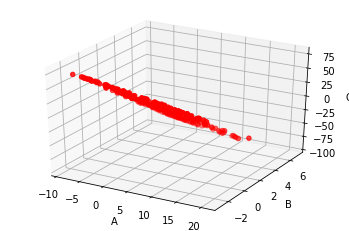

In [16]:
pred = []
for i in range(len(data2)):
    pred += [reg_coef[0] + reg_coef[1]*data2[i][0] + reg_coef[2]*data2[i][1]]

# Re-visualize
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df2.A
y = df2.B
z = pred

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

plt.show()

/home/sumin/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


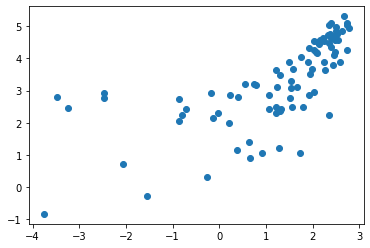

In [17]:
# exploratory analysis to instpect nonlinear relationships
# Plotting the loglog plot can estimate the degree of the relevant
# polynomial. In the case of A vs. C, the loglog plot appears to have 
# slope of 1, which suggests that the relationship between between A and
# C is closest to degree 1 polynomial.
fig = plt.scatter(np.log(df2.A), np.log(df2.C))

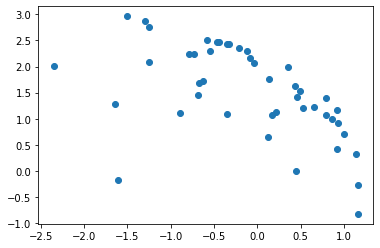

In [18]:
# Plotting the loglog plot can estimate the degree of the relevant
# polynomial. In the case of B vs. C, the loglog plot appears to have 
# slope of -1, which suggests that 1/B is more relevant than B in 
# estimating C.
fig3 = plt.scatter(np.log(df2.B), np.log(df2.C))

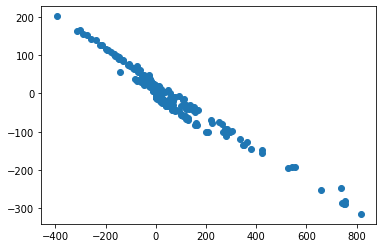

In [19]:
# Also plotted a variety of interaction terms and observed that
# A^2*B vs. C has the most linear relationship.
fig2 = plt.scatter(df2.A**2*df2.B, df2.C)

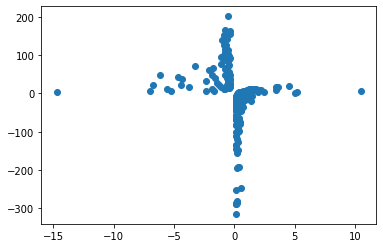

In [20]:
fig4 = plt.scatter(1/df2.B, df2.C)

In [21]:
# from the observations, pre-process to work with logs of the data
data2 = pd.DataFrame.to_numpy(df2)
reg_coef = NonLinReg(data2,len(data2))
wrong = NonLinDiff(data2,reg_coef,len(data2))
print('mse: ', wrong)
print('coefficients :', reg_coef)

mse:  0.4253755897833225
coefficients : [4.125420739688545, 2.4329262134615526, -0.49052698278513834, -0.4284904096518287]


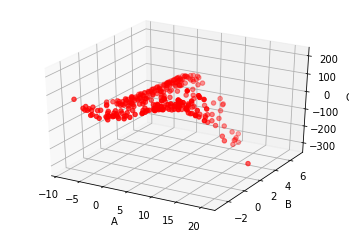

In [22]:
# predict C using A, B, and the regrssion model
pred = []
for i in range(len(data2)):
    x = data2[i][0]
    y = data2[i][1]
    pred += [reg_coef[0] + reg_coef[1]*x + reg_coef[2]/y + reg_coef[3]*x**2*y]

# Re-visualize
# This is the plot of the final created model.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df2.A
y = df2.B
z = pred

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

plt.show()

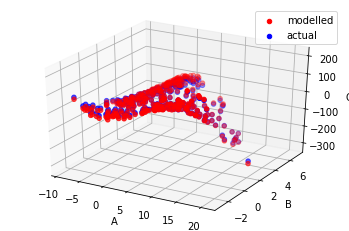

In [23]:
# Final Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df2.A
y = df2.B
z = pred

ax.scatter(x, y, z, c='r', marker='o')

x = df2.A
y = df2.B
z = df2.C

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

ax.legend(['modelled', 'actual'])

plt.show()

In [24]:
# Validate the model using 3-fold cross validation
np.random.shuffle(data2)
train = [data2[0:200], np.vstack((data2[0:100], data2[200:299])), data2[100:299]]
test = [data2[200:299], data2[100:200], data2[0:100]]
for i in range(3):
    reg_coef = NonLinReg(train[i], len(train[i]))
    train_error = NonLinDiff(train[i], reg_coef, len(train[i]))
    test_error = NonLinDiff(test[i], reg_coef, len(test[i]))
    print('mse: ', train_error, test_error)
    print('coefficients :', reg_coef)

mse:  0.5485881894498225 0.6543339929248712
coefficients : [4.443694171023921, 2.432735676579783, -0.4252403754410056, -0.4307274569765501]
mse:  0.4916421554782056 0.8210232635110853
coefficients : [3.9603721958118947, 2.4773235350381873, -0.729640490732741, -0.4257713964830547]
mse:  0.5168329412288146 0.7529135288331804
coefficients : [3.944613562359398, 2.392150818733912, -0.3458245471968425, -0.42919663098500666]


In [25]:
# Conclusion
# When first visualizing data, there was a clear outlier that stood out in all (3d, A vs. C, B vs. C) plots.
# So I first pre-processed the data by removing the outlier. As simplest models are often the best, I proceeded
# with linear regression and achieved MSE of 3.205. This MSE seemed a bit high in comparison to the magnitude of 
# elements of 'C', and the 3D plot also looked drastically different. Thus, I moved on to nonlinear regression and
# started looking for relevant nonlinear terms and interaction terms. Through various visualizations, I selected the 
# terms that appeared most linear when plotted against and utilized loglog plots to gain intuition for the degree of
# polynomials. The best performing model was nonlinear regression with constant term, x, 1/y, and x^2*y, and these terms
# were selected in exploratory analysis. Training on all of data (except the outlier), the final trained model
# C = 4.125420739688545  + 2.4329262134615526*A - 0.49052698278513834/B - 0.4284904096518287*A^2*B achieved MSE of 0.425.
# Also, when plotted in 3D, this model was a lot more accurate than the linear model from before. Since we are not
# allowed to use packages, I stopped adding on more interaction terms to further lower the MSE due to the risk of 
# overfitting. To further validate against overfitting, I performed a 3-fold cross validation using the nonlinear 
# model from before. From the 3-fold cross validation, while both the train error and test error slightly increased, 
# there were no extreme test errors that signalled overfitting. If given access to more packages and time, I would
# further attempt to improve the accuracy by utilizing statistics-backed feature selection, more robust models such
# as regression trees, and balance between explaining the data and overfitting through a series of F-tests and 
# instrumental variable analysis.